In [4]:
# Needed Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import pickle
import matplotlib.pyplot as plt
from math import isqrt

In [ ]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'  # this is required
os.environ['CUDA_VISIBLE_DEVICES'] = '2'          # set to '0' for GPU0, '1' for GPU1 or '2' for GPU2. Check "gpustat" in a terminal.

In [5]:
delim = ';'
user_count = 100
base_path = '/opt/iui-datarelease1-sose2021/'
Xpickle_file = './X.pickle'
ypickle_file = './y.pickle'

# Function that opens and reads pickle Data from FS and returns the read data as NumpyArray
def load_pickles():
    _p = open(Xpickle_file, 'rb')
    X = pickle.load(_p)
    _p.close()
        
    _p = open(ypickle_file, 'rb')
    y = pickle.load(_p)
    _p.close()
    
    return (np.asarray(X, dtype = pd.DataFrame), np.asarray(y, dtype = str))

In [6]:
# Function used to save data as a pickle file
def save_pickle():
#     _p = open(np.asarray(data, dtype=pd.DataFrame), 'wb')
    _p = open(Xpickle_file, 'wb')
    pickle.dump(X, _p)
    _p.close()

#     _p = open(np.asarray(label, dtype=str), 'wb')
    _p = open(ypickle_file, 'wb')
    pickle.dump(y, _p)
    _p.close()

In [7]:
# Function that loads data from the picklefiles and prints them into NumpyArrays (one for Data and one for Lables)
def load_data():
    if os.path.isfile(Xpickle_file) and os.path.isfile(ypickle_file):
        return load_pickles()
    data = []
    label = []
    for user in range(0, user_count):
        user_path = base_path + str(user) + '/split_letters_csv/'
        for file in os.listdir(user_path):
            file_name = user_path + file
            letter = ''.join(filter(lambda x: x.isalpha(), file))[0]
            data.append(pd.read_csv(file_name, delim))
            label.append(letter)
    return (np.asarray(data, dtype = pd.DataFrame), np.asarray(label, dtype = str))

In [8]:
# Load Data
X, y = load_data()
len(X), len(y)

(13102, 13102)

In [9]:
# Show Data Shape
print(X.shape)
print(y.shape)        

(13102,)
(13102,)


In [ ]:
# Show how many datasets are make how many percent  
X_len = np.asarray(list(map(len, X)))
l = []
sq_xlen = pd.Series(X_len)
ptiles = [x*0.01 for x in range(100)]
for i in ptiles:
    l.append(sq_xlen.quantile(i))
plt.plot(l, ptiles)
sq_xlen.describe(percentiles=[x*0.01 for x in range(90,100)])

In [17]:
# Remove outliner data from the dataset
threshold_p = 0.99
threshold = int(sq_xlen.quantile(threshold_p))
len_mask = np.where(X_len <= threshold)

X_filter = X[len_mask]
y_filter = y[len_mask]

In [98]:
# Sliding Window Function
def sliding_window(data):
    input_data = data
    _window_sz = 10
    sum_windows_passed = 0
    
    
    data_above_thresh = []
    thresh = 70
    
    values_sum = 0
    
    for i in range(0, len(input_data), _window_sz):
        for j in range(i, min(i + _window_sz, len(input_data))):
            values_sum += input_data[j]
        data_above_thresh.append(values_sum / _window_sz)
        
    return data_above_thresh

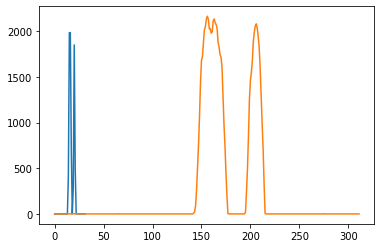

In [75]:
input_data = X[5]['Force']
window_sz = 10
sum_windows_passed = 0
    
    
win_above_thresh = []
thresh = 70
    
    
for i in range(0, len(input_data), window_sz):
    values_sum = 0
    for j in range(i, min(i + window_sz, len(input_data))): 
        values_sum += input_data[j]

    win_above_thresh.append(values_sum / window_sz)
    
plt.plot(win_above_thresh)
plt.plot(X[5]['Force'])

In [111]:
_blep = np.where(np.asarray(win_above_thresh) > thresh)

for i in range(len(_blep[0])):
    _blep[0][i] = _blep[0][i] * window_sz
    
print(_blep) # s.u. Range der Daten über threshold ist von 140 bis 180 und von 190 bis 220; 
             # Alles vor 140 und nach 220 ist 0 und kann gecutted werden

(array([140, 150, 160, 170, 190, 200, 210]),)


In [120]:
X_new = X[_blep]

In [121]:
print(X.shape)
print(X_new[5]['Force'].shape)

(13102,)
(124,)


In [134]:
X.shape, X[140].shape, X_new[0].shape


((13102,), (257, 15), (257, 15))

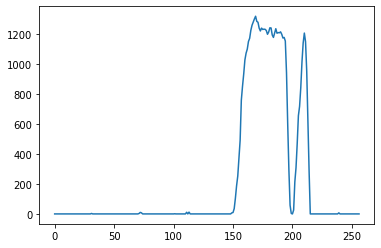

In [141]:
plt.plot(X[140]['Force'])

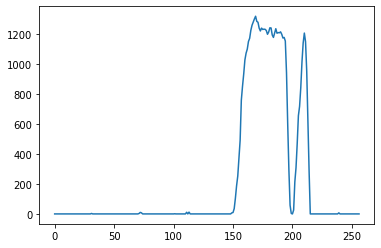

In [142]:
plt.plot(X_new[0]['Force'])

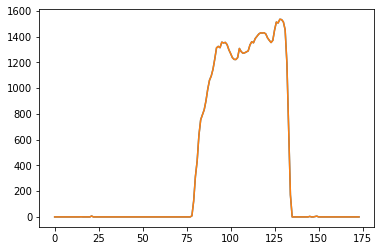

In [144]:
plt.plot(X_new[1]['Force'])
plt.plot(X[150]['Force'])